##Assignment 4
###Data Visualization using Titatnic dataset.
###Find any existing patterns in the dataset.

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [5]:
titanic  = sb.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

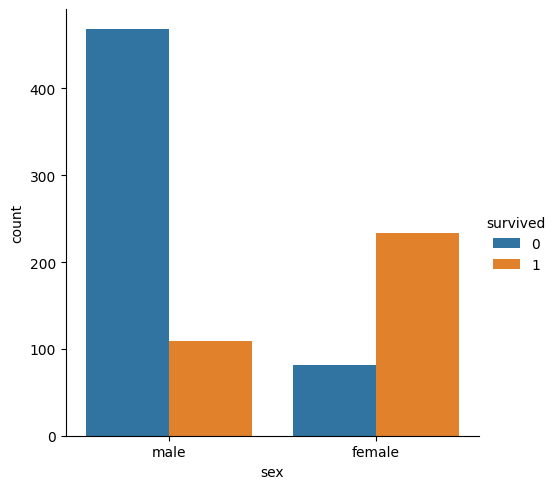

In [14]:
sb.catplot(x="sex", hue="survived", kind="count", data=titanic)

###Conclusion - Approximately 500 males and 100 females did not survive. About 100 males and 250 females survived.


##Group the dataset by Class and Survived and then unsack them

/tmp/ipykernel_5207/430170444.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = titanic.groupby(['class', 'survived'])


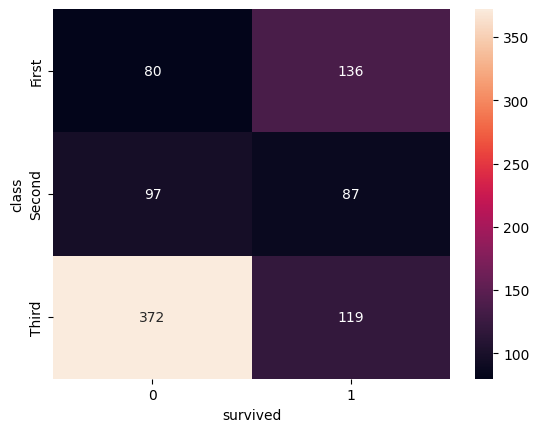

In [15]:
group = titanic.groupby(['class', 'survived'])
pclass_survived = group.size().unstack()

sb.heatmap(pclass_survived, annot = True, fmt ="d")
plt.show()

##Correlation b/w Age, Sex and distribution of Survived

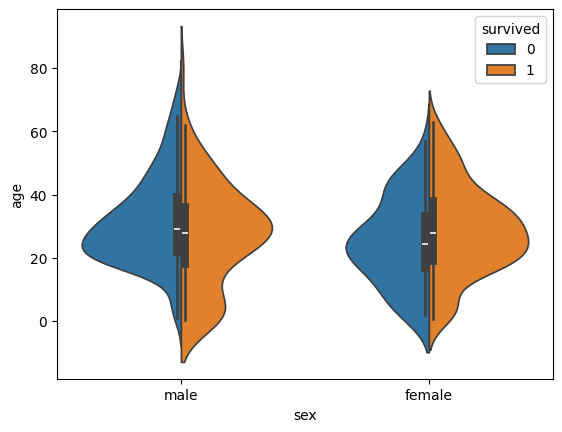

In [16]:
sb.violinplot(x ="sex", y ="age", hue ="survived", data = titanic, split = True)
plt.show()

##Correlation b/w Fare and Survival Probability
###Divide Fare into 4 bins

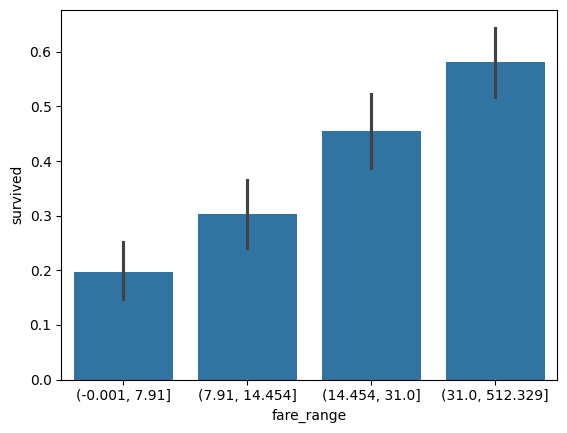

In [18]:
titanic['fare_range'] = pd.qcut(titanic['fare'], 4)
sb.barplot(x ='fare_range', y ='survived', data = titanic)
plt.show()

###Passengers who paid higher fare had a higher rate of survival.

##Correlation b/w City Embarked on, Passenger Class and Count of Survived

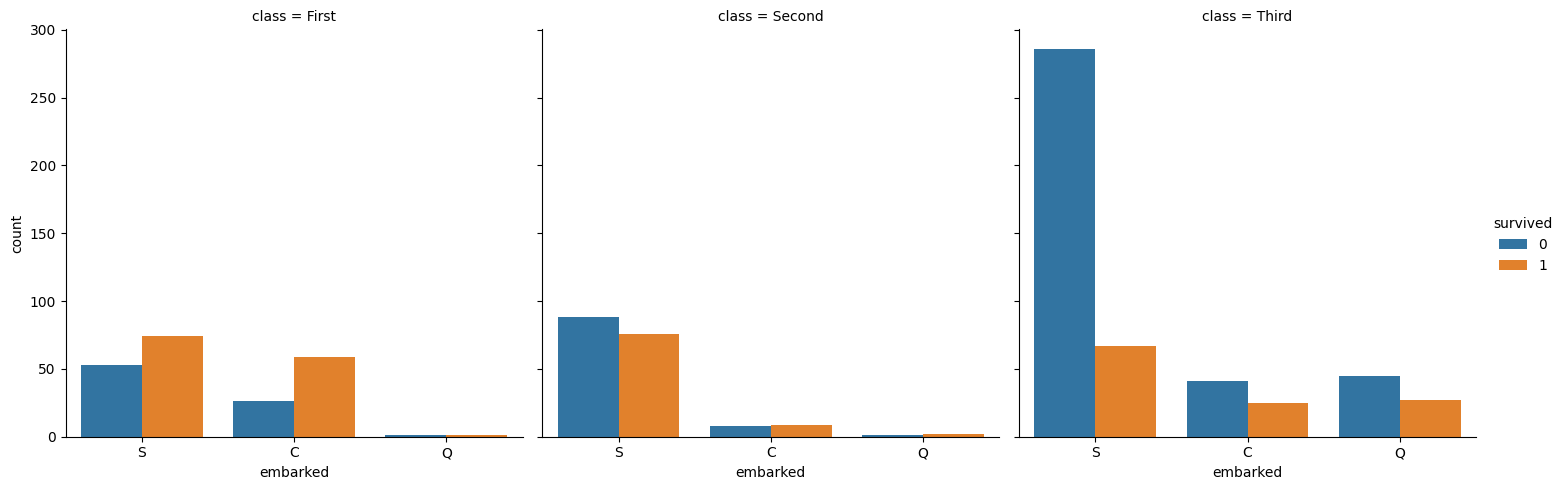

In [19]:
sb.catplot(x ='embarked', hue ='survived', kind ='count', col ='class', data = titanic)
plt.show()

#Data Visualization
##Boxplot of correlation between Age, Sex and Survival Rate

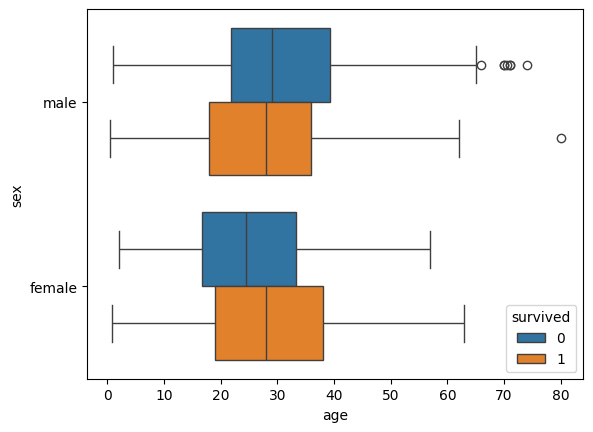

In [22]:
sb.boxplot(x=titanic['age'], y=titanic['sex'], hue=titanic['survived'], data=titanic)
plt.show()